Engine Type                       0
Cylinder No.                      0
L1 Power (kW)                     0
L1 Speed (r/min)                  0
SFOC at nominal MCR (g/kWh)       0
Power(kW)                         0
Speed(r/min)                      0
MCR                               0
SFOC                              0
Unnamed: 9                     2891
dtype: int64


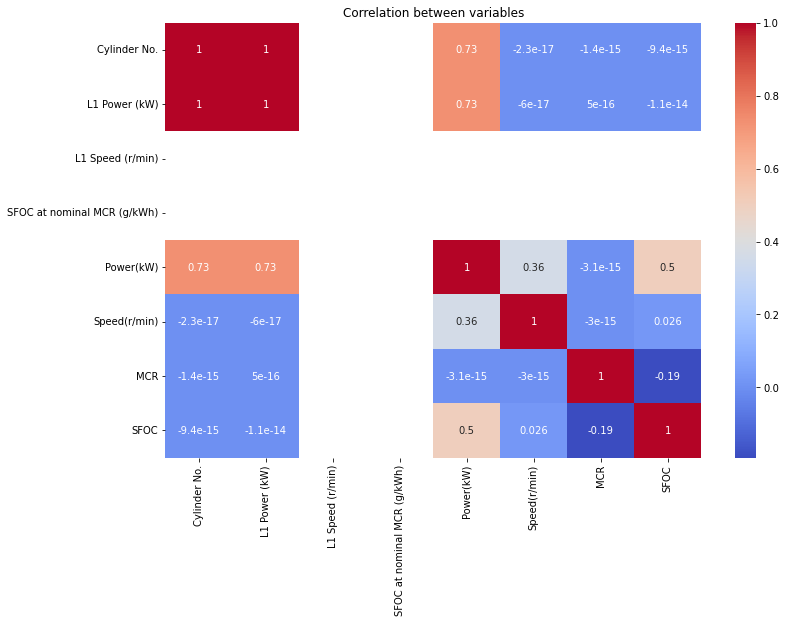

Epoch 1000/20000, Loss: 156.56475830078125
Epoch 2000/20000, Loss: 8.514691352844238
Epoch 3000/20000, Loss: 7.264816761016846
Epoch 4000/20000, Loss: 7.067432403564453
Epoch 5000/20000, Loss: 6.968061923980713
Epoch 6000/20000, Loss: 6.892020225524902
Epoch 7000/20000, Loss: 6.84347677230835
Epoch 8000/20000, Loss: 6.807791709899902
Epoch 9000/20000, Loss: 6.78024959564209
Epoch 10000/20000, Loss: 6.728011131286621
Epoch 11000/20000, Loss: 6.6872687339782715
Epoch 12000/20000, Loss: 6.664656162261963
Epoch 13000/20000, Loss: 6.648743152618408
Epoch 14000/20000, Loss: 6.634937763214111
Epoch 15000/20000, Loss: 6.629682540893555
Epoch 16000/20000, Loss: 6.624203681945801
Epoch 17000/20000, Loss: 6.621090412139893
Epoch 18000/20000, Loss: 6.618818283081055
Epoch 19000/20000, Loss: 6.6158952713012695
Epoch 20000/20000, Loss: 6.601799488067627
Test Loss: 7.502472400665283
真实值: 
 [[167.62]
 [161.1 ]
 [166.95]
 [166.5 ]
 [159.  ]]
预测值: 
 [[167.65408]
 [164.09361]
 [167.17403]
 [166.89948]
 [

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch
import torch.nn as nn
import torch.optim as optim

# 1. 读取Excel文件
file_path = 'S50MC6_2.xlsx'  # 替换为你的文件路径
df = pd.read_excel(file_path)

# 2. 数据预处理
# 检查数据是否有缺失值
print(df.isnull().sum())

# 将目标列与输入分开
X = df[["Power(kW)", "Speed(r/min)", "MCR"]]
# X = df[["Cylinder No.", "L1 Power (kW)", "L1 Speed (r/min)", "Power(kW)", "Speed(r/min)", "MCR"]]
y = df[["SFOC"]]

# 标准化特征
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. 计算不同变量之间的相关性
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation between variables")
plt.show()

# 4. 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 5. 转换数据为PyTorch张量
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)

# 6. 构建全连接神经网络模型
class NeuralNetwork(nn.Module):
    def __init__(self, input_size, output_size):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, output_size)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# 初始化模型
input_size = X_train.shape[1]
output_size = y_train.shape[1]
model = NeuralNetwork(input_size, output_size)

# 7. 定义损失函数和优化器
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 8. 训练模型
epochs = 20000
for epoch in range(epochs):
    model.train()

    # 前向传播
    y_pred_train = model(X_train_tensor)
    loss = criterion(y_pred_train, y_train_tensor)

    # 反向传播和优化
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 1000 == 0:
        print(f'Epoch {epoch+1}/{epochs}, Loss: {loss.item()}')

# 9. 测试模型
model.eval()
y_pred_test = model(X_test_tensor)
test_loss = criterion(y_pred_test, y_test_tensor)
print(f'Test Loss: {test_loss.item()}')

# 10. 打印预测结果和真实值的差异
print("真实值: \n", y_test_tensor[:5].detach().numpy())
print("预测值: \n", y_pred_test[:5].detach().numpy())
